# What economic indicators best predict happiness globally?



## Introduction

In the 2024 UK General Election, the winning Labour party’s primary objective in its manifesto was economic growth, arguing that sustained growth is essential to improve prosperity and living standards (Weston, 2025). This follows a general trend in the post-war age of neoliberalism, where constant growth is valued and prioritised above all else (Raworth, 2017) – a marked change from the previous century where an economy was judged on living standards. This presents multiple long-term issues, with Raworth arguing that pursuing continual economic growth will eventually cause catastrophic damage to the planet, having a huge impact on human and non-human life. 

If GDP growth is bad for us in the long run, that means that in order to continue being economically active, our economic goals must shift to metrics that reflect the wellbeing of the people and the planet. The World Happiness Report is an annual publication that contains worldwide rankings of national happiness (World Happiness Report, 2025), and its “Gross National Happiness” index has been considered a potential alternative to GDP as a single common metric by which to to measure a nation’s growth/improvement (Campbell, 2012).

This project examines the relationship between GDP and five alternative national economic indicators, and reported levels of happiness according to the World Happiness Report. Its aim is to assess whether the economic metrics that currently dominate policy-making are closely aligned with citizen wellbeing, or whether alternative and less-prominent indicators show a stronger association with national happiness. 

To investigate this question, we will be conducting multiple analyses, including multiple linear regression and mixed effects models. The five alternative national economic indicators are predictors within these models, and were chosen as they take a more experience-based view of a national economy. These predictors are GDP per capita, GDP based on purchasing power parity, % population that lives in an urban area, value added in service actor, and HDI (human development index).

**Hypotheses**

- Null hypothesis - h<sub>0</sub> : None of the selected metrics correlate significantly with happiness
- Hypothesis 1 - h<sub>1</sub> : Alternative selected metrics significantly positively correlate with happiness more than GDP-related metrics
- Hypothesis 2 - h<sub>2</sub> : Alternative selected metrics significantly positively correlate with happiness less than GDP-related metrics

**References**
- Campbell, A. (2012). The Happy Depressive: In Pursuit of Personal and Political Happiness. Random House.
- Raworth, K. (2017). Doughnut economics: seven ways to think like a 21st-century economist. Random House Business Books.
- Weston, T. (2025, December 15). King’s Speech 2024: Economic affairs, business and trade. House of Lords Library. https://lordslibrary.parliament.uk/research-briefings/lln-2024-0032/ 
- World Happiness Report. (2025). Worldhappiness.report. https://www.worldhappiness.report/


## Data collection and preprocessing

### Data collection


We obtained the economic data from theglobaleconomy.com, which provides a broad selection of global economic data ranging from 1960-2024, from 200 countries. This data is mostly obtained from the World Bank, and appears to be a reliable source for large amounts of such information.

The happiness data was originally collected from https://www.worldhappiness.report/data-sharing/, but was then obtained from theglobaleconomy.com along with the rest of the data. The World Happiness Report is collated from data from the Gallup world poll, and the data on individual happiness is collected through this question: 

*Please imagine a ladder with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you. On which step of the ladder would you say you personally feel you stand at this time?*

The data we originally collected was collated, cleaned and filtered, along with an additional dataset downloaded from Kaggle that we were originally planning on using, in a notebook called *old_cleaning.ipynb*


In [6]:
## import libraries and collate data

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt
import os
import warnings

warnings.filterwarnings('ignore')
files = os.listdir("data/")
merged = None

for filename in files:
    _df = pd.read_csv("data/"+filename)
    if merged is None:
        merged = _df
    else:
        merged = pd.merge(merged, _df, on=["Country", "Year", "Code", "ContinentCode"], how="outer")

df = merged[(merged["Year"] >= 2013) & (merged["Year"] <= 2024)] # selecting years where we have happiness 
df.head(3)

,Country,Code,ContinentCode,Year,Internet users percent of population,Broadband internet subscribers in thousands,Fixed broadband internet subscribers per 100 people,Mobile phone subscribers in millions,Mobile phone subscribers per 100 people,Mobile network coverage percent of the population,...,Healthcare price index world average = 100,Transport prices world average = 100,Hotel and restaurant price index world average = 100,Vehicle prices world average = 100,Communication price index world average = 100,Recreation and culture price index world average = 100,Education service price index world average = 100,Machinery and equipment prices world average = 100,Short-term debt percent of total external debt,Short-term external debt percent of international reserves
53,Afghanistan,AFG,AS,2013,5.90,2.0,0.00,16.81,53.15,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.09,1.45
54,Afghanistan,AFG,AS,2014,7.00,2.0,0.00,18.41,56.13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.88,2.31
55,Afghanistan,AFG,AS,2015,8.26,7.0,0.02,19.71,58.26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.08,4.13


### Handling missing data

When we received the dataset, we noticed that for many more obscure metrics there was a large amount of missing data. This was across a large number of both countries and metrics. In order to remedy this, the data was sorted in order of proportion of missing data to identify which metrics and countries would be less useful to our analysis. 

In order to pick a year for our analysis, we also calculated the proportion of missing data for each year and displayed it graphically. This allowed us to select 2018 as our year, as it had the least amount of missing data.

MISSING DATA BY COLUMN


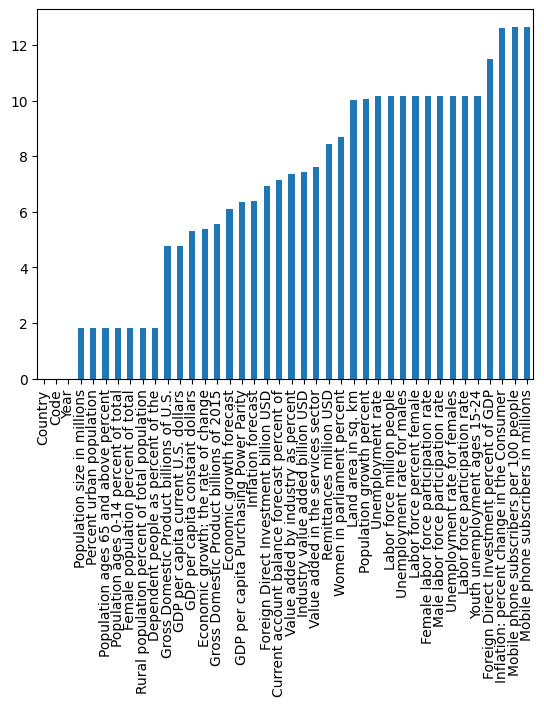

In [7]:
## calculate missing data by column and display the 40 columns with least missing data

bycol = df.apply(lambda x: round((x.isnull().sum().sum()/x.size)*100, 2)).sort_values()
bycol[:40].plot(kind="bar")

print("MISSING DATA BY COLUMN")
ticks, labels = plt.xticks()
newlabels = [" ".join(label.get_text().split()[:6]) for label in labels]
plt.xticks(ticks, newlabels)
plt.show()

MISSING DATA BY COUNTRY


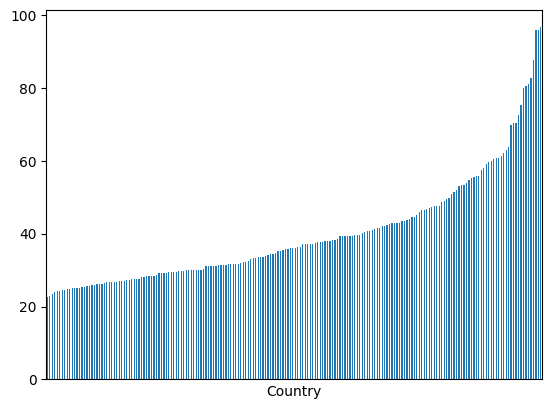

In [8]:
## calculate missing data by country and display overall distribution

print("MISSING DATA BY COUNTRY")
bycountry = df.groupby("Country").apply(lambda x: round((x.isnull().sum().sum()/x.size)*100, 2)).sort_values()
bycountry.plot(kind="bar")

plt.xticks([], [])
plt.show()

Above: Distribution plot of missing data with countries on the x-axis

MISSING DATA BY YEAR


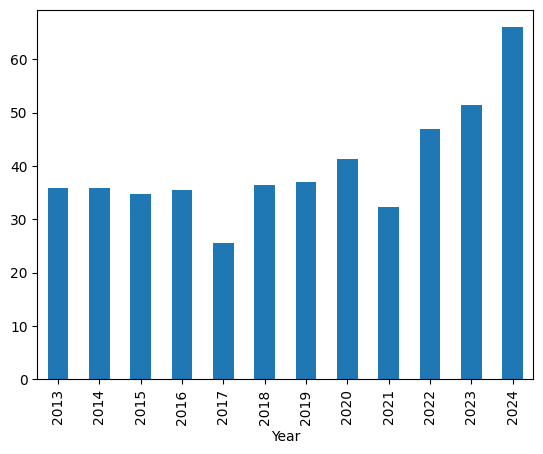

In [9]:
## calculate and display missing data rate by year

print("MISSING DATA BY YEAR")
byyear = df.groupby("Year").apply(lambda x: round((x.isnull().sum().sum()/x.size)*100, 2)) #.sort_values()
byyear.plot(kind="bar")
plt.show()

Above: Distribution plot of missing data from each year

### Data preprocessing

In [10]:
## rename columns and strip special characters to make analysis easier

rename_dict = {"Happiness Index 0 (unhappy) - 10 (happy)": "happiness",
               "Gross Domestic Product billions of U.S. dollars": "GDP",
                "GDP per capita current U.S. dollars": "GDP_per_capita",
                "GDP per capita Purchasing Power Parity": "GDPPPP",
                "Human Development Index (0 - 1)": "HDI",
                "Value added in the services sector as percent of GDP": "Services_value_added_GDP"}

df2018 = df.rename(rename_dict, axis=1)

for c in [" ", "/", "-", "(", ")", ":", ".", "%", "="]:
    df2018.columns = df2018.columns.str.replace(c, "_")

df2018 = df2018[df2018["Year"] == 2018]
happy_col = df2018.pop("happiness")
df2018.insert(4, "happiness", happy_col)
df2018.head(3)

,Country,Code,ContinentCode,Year,happiness,Internet_users_percent_of_population,Broadband_internet_subscribers_in_thousands,Fixed_broadband_internet_subscribers_per_100_people,Mobile_phone_subscribers_in_millions,Mobile_phone_subscribers_per_100_people,...,Healthcare_price_index_world_average___100,Transport_prices_world_average___100,Hotel_and_restaurant_price_index_world_average___100,Vehicle_prices_world_average___100,Communication_price_index_world_average___100,Recreation_and_culture_price_index_world_average___100,Education_service_price_index_world_average___100,Machinery_and_equipment_prices_world_average___100,Short_term_debt_percent_of_total_external_debt,Short_term_external_debt_percent_of_international_reserves
58,Afghanistan,AFG,AS,2018,3.63,16.8,16.0,0.04,21.98,59.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.19,5.29
123,Albania,ALB,EU,2018,4.59,65.4,362.0,12.51,2.71,93.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.48,23.49
194,Algeria,DZA,AF,2018,5.30,49.0,3067.0,7.22,47.15,110.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.61,2.65


## Analysis

#### Exploratory analysis - selecting economic indicators

First, we had to run a preliminary test to select our predictors that had the best chance of representing happiness. We did this by selecting predictors that had a low proportion of missing data and a high R2 value. This was done by sorting every predictor by R2 value and removing any predictors with more than 10% missing data. 

From this, we then selected 6 metrics from the list, GDP, GDP per capita, GDP PPP (Purchasing Power Parity), percentage urban population, value added from the service sector as a percentage of GDP, and the human development index - which is calculated by finding the geometric mean of life expectancy, mean schooling years and Gross National Income (GNI) per capita.

In [ ]:

error_vars = []
results = pd.DataFrame(columns=["Coef", "R2", "P", "Missing"])

for var in df2018.columns[4:]:
    if not var == "happiness":
        try:
            model = smf.ols(f'happiness ~ {var}', data=df2018, missing="drop").fit()
            #print(f"{model.rsquared.round(3)} (p={model.pvalues[var].round(3)}):         {var}")
            results.loc[var] = pd.Series({"Coef": model.params[var].round(3),
                                        "R2": model.rsquared.round(3),
                                        "P": model.pvalues[var].round(3),
                                        "Missing": df2018[var].isna().sum()/len(df2018[var])})
        except ValueError as error:
            error_vars.append(var)

print("INDIVIDUAL LINEAR REGRESSION FOR ECONOMIC INDICATORS FOR EVERY COUNTRY IN 2018")
results.sort_values(by="R2", ascending=False).head(10)

INDIVIDUAL LINEAR REGRESSION FOR ECONOMIC INDICATORS FOR EVERY COUNTRY IN 2018


,Coef,R2,P,Missing
HDI,5.970,0.684,0.0,0.080
Internet_users_percent_of_population,0.033,0.640,0.0,0.150
Poverty_ratio_percent_living_on_less_than_5_50_USD_a_day,-0.025,0.569,0.0,0.545
Fixed_broadband_internet_subscribers_per_100_people,0.060,0.564,0.0,0.135
GDPPPP,0.000,0.553,0.0,0.060
GDP_per_capita_constant_dollars,0.000,0.538,0.0,0.050
GDP_per_capita,0.000,0.536,0.0,0.040
Self_employment_percent_of_total_employment,-0.030,0.525,0.0,0.100
Population_ages_0_14_percent_of_total,-0.072,0.508,0.0,0.020
Quality_of_air_transport_infrastructure_1_low____7_high_,0.756,0.480,0.0,0.300


In [61]:
# filter data & removing indicators with 10% or more missing data
results[results["Missing"] < 0.1].sort_values(by="R2", ascending=False).head(20)

,Coef,R2,P,Missing
HDI,5.970,0.684,0.000,0.080
GDPPPP,0.000,0.553,0.000,0.060
GDP_per_capita_constant_dollars,0.000,0.538,0.000,0.050
GDP_per_capita,0.000,0.536,0.000,0.040
Population_ages_0_14_percent_of_total,-0.072,0.508,0.000,0.020
Rural_population_percent_of_total_population,-0.035,0.469,0.000,0.020
Percent_urban_population,0.035,0.469,0.000,0.020
Dependent_people_as_percent_of_the_working_age_population,-0.039,0.371,0.000,0.020
Services_value_added_GDP,0.063,0.355,0.000,0.055
Population_ages_65_and_above_percent_of_total,0.100,0.354,0.000,0.020


#### Primary analysis - multiple regression

In [15]:
# multiple regression with selected indicators
selected_indicators = ["GDP", "GDPPPP", "GDP_per_capita", "Percent_urban_population", "Services_value_added_GDP", "HDI"]

model = smf.ols(f'happiness ~ {" + ".join(selected_indicators)}', data=df2018).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     64.90
Date:                Mon, 15 Dec 2025   Prob (F-statistic):           3.85e-38
Time:                        20:20:25   Log-Likelihood:                -127.94
No. Observations:                 148   AIC:                             269.9
Df Residuals:                     141   BIC:                             290.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.7981      0.357      5.033      0.000       1.092       2.505
GDP                      -1.245e-05   2.38e-05     -0.524      0.601   -5.94e-05    3.45e-05
GDPPPP                   -1.717e-05   7.49e-06     -2.291      0.023    -3.2e-05   -2.36e-06
GDP_per_capita            3.027e-05   7.71e-06      3.929      0.000     1.5e-05    4.55e-05
Percent_urban_population     0.0062      0.004      1.760      0.081      -0.001       0.013
Services_value_added_GDP    -0.0033      0.007     -0.498      0.619      -0.016       0.010
HDI                          4.6435      0.666      6.973      0.000       3.327       5.960
==============================================================================
Omnibus:                        1.100   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.037
Skew:                          -0.203   Prob(JB):                        0.596
Kurtosis:                       2.938   Cond. No.                     6.47e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Primary analysis - interaction effects

In [11]:
# measuring interaction effects between GDP PPP and HDI 
model = smf.ols('happiness ~ GDPPPP*HDI', data=df2018).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     113.5
Date:                Mon, 15 Dec 2025   Prob (F-statistic):           9.23e-38
Time:                        20:16:46   Log-Likelihood:                -136.19
No. Observations:                 148   AIC:                             280.4
Df Residuals:                     144   BIC:                             292.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8573      0.334      5.559      0.000       1.197       2.518
GDPPPP     -2.984e-05   3.35e-05     -0.891      0.375   -9.61e-05    3.64e-05
HDI            4.6724      0.549      8.511      0.000       3.587       5.758
GDPPPP:HDI  4.259e-05   3.52e-05      1.208      0.229   -2.71e-05       0.000
==============================================================================
Omnibus:                        0.879   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.998
Skew:                          -0.157   Prob(JB):                        0.607
Kurtosis:                       2.749   Cond. No.                     6.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# measuring interaction effects between proportion urban population and HDI 
model = smf.ols('happiness ~ Percent_urban_population*HDI', data=df2018).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     115.7
Date:                Mon, 15 Dec 2025   Prob (F-statistic):           2.10e-38
Time:                        20:17:31   Log-Likelihood:                -138.54
No. Observations:                 150   AIC:                             285.1
Df Residuals:                     146   BIC:                             297.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        2.7659      0.664      4.165      0.000       1.454       4.078
Percent_urban_population        -0.0247      0.013     -1.942      0.054      -0.050       0.000
HDI                              2.9291      1.036      2.828      0.005       0.882       4.976
Percent_urban_population:HDI     0.0430      0.017      2.568      0.011       0.010       0.076
==============================================================================
Omnibus:                        1.695   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                1.699
Skew:                          -0.252   Prob(JB):                        0.428
Kurtosis:                       2.863   Cond. No.                     2.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# measuring interaction effects between service industry value added as % of GDP and HDI 
model = smf.ols('happiness ~ Services_value_added_GDP*HDI', data=df2018).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     110.4
Date:                Mon, 15 Dec 2025   Prob (F-statistic):           2.90e-37
Time:                        20:18:04   Log-Likelihood:                -140.07
No. Observations:                 149   AIC:                             288.1
Df Residuals:                     145   BIC:                             300.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        3.4578      1.249      2.768      0.006       0.989       5.926
Services_value_added_GDP        -0.0445      0.025     -1.754      0.081      -0.095       0.006
HDI                              2.3193      1.695      1.368      0.173      -1.031       5.670
Services_value_added_GDP:HDI     0.0661      0.032      2.064      0.041       0.003       0.129
==============================================================================
Omnibus:                        2.127   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                2.074
Skew:                          -0.285   Prob(JB):                        0.354
Kurtosis:                       2.902   Cond. No.                     2.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Discussion

From our multiple regression, we found that GDP was vastly statistically insignificant in predicting happiness, with a p-value of 0.601. GDP PPP on the other hand was found to be significant (p = 0.023), but interestingly with a negative coefficient. GDP per capita was found to be greatly significant in predicting happiness, but with a very small positive correlation. 

Demographic and structural variables showed weaker relationships with happiness. The proportion of the population living in urban areas displayed a small positive coefficient of p = 0.081, which was not statistically significant. Similarly, the value added by the services sector as a proportion of GDP was statistically insignificant (p = 0.619) and weakly negative, suggesting that economic structure alone does not robustly predict a nation’s happiness outcomes. 

By contrast, the Human Development Index (HDI) was the strongest predictor within this model, with a large, positive, and highly statistically significant coefficient (p < 0.001). This indicates that broader measures of human development are far more closely aligned with national average happiness than traditional/solely economic growth metrics.

The interaction between GDP (PPP) and the HDI was not statistically significant, suggesting that higher aggregate purchasing power does not meaningfully modify the association between development and happiness. In contrast, for both the interaction between % urban population + HDI and share of value added by service sector + HDI, the relationship was statistically significant with a small positive correlation, indicating that urbanisation is positively associated with happiness in countries with higher levels of human development. 

## Conclusion

Overall, these findings support the argument that GDP-based indicators alone are poor predictors of a nation’s happiness, whereas composite development measures are more closely aligned with happiness. Therefore, we reject h<sub>0</sub> and h<sub>2</sub>, and accept h<sub>1</sub>, as HDI, an alternative metric, significantly positively correlates with happiness. Additionally, the impact of the other two non-GDP metrics was greater than that of the GDP metrics as a predictor of happiness globally, further justifying this conclusion.

## Limitations

Although the findings strongly suggest that HDI in particular is more closely aligned with national happiness than GDP in 2018, they should be interpreted as associative rather than causal. Furthermore, the analysis is cross-sectional, focusing on a single year. While this choice was justified by the amount of data available in the metrics we were interested in, it prevents analysis of causal relationships or longer-term trends. There is no way to evaluate whether 2018 was an outlier, meaning we cannot apply our findings to other years. 

Although removing predictors and countries with high proportions of missing data was methodologically necessary, it introduces selection bias. Countries with weaker statistical infrastructure – often lower-income nations – are more likely to be excluded, which may skew results toward wealthier or more developed countries and inflate the apparent strength of development-based indicators such as HDI. Although the p-value for HDI and happiness was clearly statistically significant, this is still a limitation of our methodology.

In terms of outliers, both the United States and China are extreme outliers for GDP due to their massive economic size, which exerted a disproportionate influence on the regression line. Despite their significantly different GDPs from the majority, neither country had extreme happiness scores, reinforcing the weak association between the two variables. We did not deem it appropriate to remove these countries from our analysis for GDP, as they represent genuine observations and are central to the global population and economy.

If we had more time in this exploratory study, we would undoubtedly investigate further interactions between human development index and other metrics as a predictor of happiness, to search further for a new economic target metric for the modern age.

It would also be interesting to conduct a similar study using delta-values across different time periods from the database, as this was one of our initial aims, but was rejected to bring the scope of the project down. Alternatively, a longitudinal design could be employed to track countries over extended periods, enabling stronger inferences about temporal dynamics and potential causal relationships between economic development, structural change, and happiness.